In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
import skfmm
from tqdm import tqdm
import time
import collections
import operator
import matplotlib.path as mpltPath
import cv2
from scipy.spatial import cKDTree
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from IPython.display import HTML
from matplotlib import animation

In [3]:
#input is the levelset
def curvature(ellipse):
    """
    the input of this function is levelset
    output is the curvature
    """
    small=1e-10
    
    [phiy,phix]=np.gradient(ellipse)
    phinorm=np.sqrt(np.square(phiy)+np.square(phix))
    ny=phiy/(phinorm+small)#avoid division by zero
    nx=phix/(phinorm+small)
    [_,nxx]=np.gradient(nx)
    [nyy,_]=np.gradient(ny)
    return nyy+nxx

def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig



def contour2levelset(Y,X,y_para,x_para):
    """
    Y,X: the meshgrids where we want to compute the levelset
    y_para,x_para: two arrays of [1,n] containing the contour coordinates in each direction
    output:levelset computed on the grid that has the same size as X,Y
    """
    data=np.stack((y_para, x_para), axis=-1)
    grid = np.stack((Y.flatten(), X.flatten()), axis=-1)

    # build tree for faster search
    tree = cKDTree(data)
    # search
    closest_dist, closest_idx = tree.query(grid, 1)

    # compute normals
    normal_x = -np.gradient(x_para)
    normal_y = np.gradient(y_para)

    # compute sign of normal
    sign = ((grid[:, 0] - data[closest_idx, 0]) * normal_x[closest_idx]) + (
        (grid[:, 1] - data[closest_idx, 1]) * normal_y[closest_idx]
    )

    # reshape data
    closest_dist = closest_dist.reshape(Y.shape)
    sign = sign.reshape(Y.shape)

    # compute edm
    levelset = (np.sign(sign) * closest_dist)
    return levelset

In [4]:
"""
parameters for initializing the grid
"""
nx = 101
ny = 101


dx = 2 / (nx - 1)
dy = 4 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 4, ny)
X, Y = np.meshgrid(x, y)

In [5]:
"""
use the parametric function to make a ellipse
"""

theta=np.arange(0,2*np.pi+0.1,0.1)
x_para=1+(1/2)*np.cos(theta)
y_para=1+(1/4)*np.sin(theta)
circle=np.zeros((ny,nx))



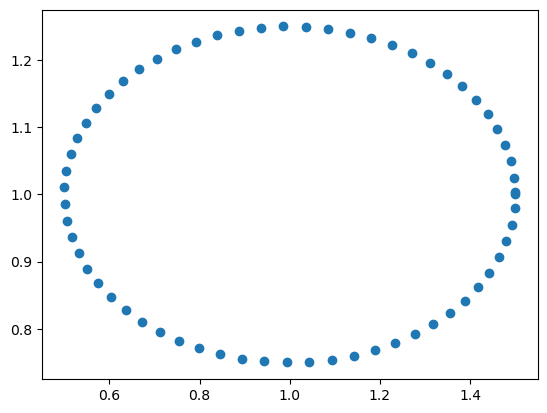

In [6]:
plt.scatter(x_para,y_para)

In [7]:
ellipse=contour2levelset(Y,X,y_para, x_para)

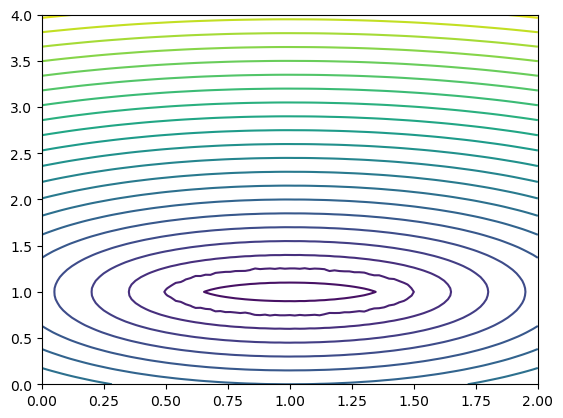

In [8]:
plt.contour(X,Y,ellipse,20)

#plt.colorbar()

In [9]:
curv=curvature(ellipse)

(array([[  0., 101.,   0., ...,   0.,   0.,   0.],
        [  0., 101.,   0., ...,   0.,   0.,   0.],
        [  0., 101.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0., 101.,   0., ...,   0.,   0.,   0.],
        [  0., 101.,   0., ...,   0.,   0.,   0.],
        [  0., 101.,   0., ...,   0.,   0.,   0.]]),
 array([-0.25273221, -0.03588032,  0.18097157,  0.39782345,  0.61467534,
         0.83152723,  1.04837911,  1.265231  ,  1.48208288,  1.69893477,
         1.91578666]),
 <a list of 101 BarContainer objects>)

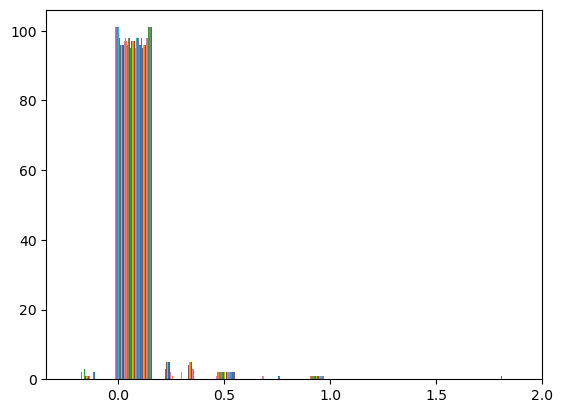

In [10]:
plt.hist(curv,bins=10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



surf=ax.plot_surface(X,Y,ellipse,cmap="coolwarm")
fig.colorbar(surf,ax=ax)
#anim = animation.FuncAnimation(fig, animate, frames=360, interval=50)
#HTML(anim.to_html5_video())